In [108]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [2]:
heart_data=pd.read_csv("Heart.csv")
heart_data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
heart_data.keys()

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Unnamed: 0    303 non-null int64
Age           303 non-null int64
Sex           303 non-null int64
ChestPain     303 non-null object
RestBP        303 non-null int64
Chol          303 non-null int64
Fbs           303 non-null int64
RestECG       303 non-null int64
MaxHR         303 non-null int64
ExAng         303 non-null int64
Oldpeak       303 non-null float64
Slope         303 non-null int64
Ca            299 non-null float64
Thal          301 non-null object
AHD           303 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [58]:
df=heart_data.fillna(0.0)
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Unnamed: 0    303 non-null int64
Age           303 non-null int64
Sex           303 non-null int64
ChestPain     303 non-null object
RestBP        303 non-null int64
Chol          303 non-null int64
Fbs           303 non-null int64
RestECG       303 non-null int64
MaxHR         303 non-null int64
ExAng         303 non-null int64
Oldpeak       303 non-null float64
Slope         303 non-null int64
Ca            303 non-null float64
Thal          303 non-null object
AHD           303 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [60]:
df.isnull()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [61]:
df.shape

(303, 15)

In [62]:
df.keys()

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [63]:
chest_pain=pd.get_dummies(df.ChestPain,drop_first=True)

In [64]:
thal=pd.get_dummies(df.Thal,drop_first=True)

In [65]:
ahd=pd.get_dummies(df.AHD,drop_first=True)

In [66]:
data=pd.concat([df.Age,df.Sex,chest_pain,df.RestBP,df.Chol,df.Fbs,df.RestECG,df.MaxHR,df.ExAng,df.Oldpeak,df.Slope,df.Ca,thal,ahd],axis=1)

In [67]:
data

,Age,Sex,nonanginal,nontypical,typical,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,fixed,normal,reversable,Yes
0,63,1,0,0,1,145,233,1,2,150,0,2.3,3,0.0,1,0,0,0
1,67,1,0,0,0,160,286,0,2,108,1,1.5,2,3.0,0,1,0,1
2,67,1,0,0,0,120,229,0,2,129,1,2.6,2,2.0,0,0,1,1
3,37,1,1,0,0,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0
4,41,0,0,1,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,0,1,110,264,0,0,132,0,1.2,2,0.0,0,0,1,1
299,68,1,0,0,0,144,193,1,0,141,0,3.4,2,2.0,0,0,1,1
300,57,1,0,0,0,130,131,0,0,115,1,1.2,2,1.0,0,0,1,1
301,57,0,0,1,0,130,236,0,2,174,0,0.0,2,1.0,0,1,0,1


In [68]:
x=data.iloc[:,0:17]
y=data.iloc[:,-1]

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [97]:
log_reg=LogisticRegression()

In [98]:
log_reg.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
# predictions
prediction=log_reg.predict(x_test)
prediction

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1], dtype=uint8)

In [100]:
# confusion matrix
confusion_matrix(y_test,prediction)

array([[24,  3],
       [ 6, 28]], dtype=int64)

In [101]:
# accuracy
log_reg.score(x_test,y_test)

0.8524590163934426

In [102]:
# precision
precision_score(y_test,prediction)

0.9032258064516129

In [103]:
# recall
recall_score(y_test,prediction)

0.8235294117647058

In [104]:
f1_score(y_test,prediction)

0.8615384615384616

In [107]:
# roc_curve
prediction_prob=log_reg.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,prediction_prob)


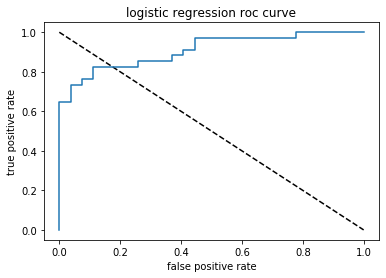

In [110]:
plt.plot([0,1],[1,0],"k--")
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("logistic regression roc curve")
plt.show()